## Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import os
import cv2

## Importing the data

In [2]:
path = os.listdir("archive/Training/")
classes = {"no_tumor" : 0, "pituitary_tumor":1, "meningioma_tumor":2, "glioma_tumor":3}

In [3]:
x = []
y = []

for cls in classes:
    pth = "archive/Training/"+cls
    for i in os.listdir(pth):
        img = cv2.imread(pth+"/"+i, 0)
        img = cv2.resize(img, (200,200))
        x.append(img)
        y.append(classes[cls])

In [4]:
x = np.array(x)
y = np.array(y)

print(x.shape)
print(y.shape)

(2870, 200, 200)
(2870,)


In [5]:
np.unique(y)

array([0, 1, 2, 3])

In [6]:
pd.Series(y).value_counts()

1    827
3    826
2    822
0    395
dtype: int64

In [7]:
x.shape

(2870, 200, 200)

## Visuilazation of data

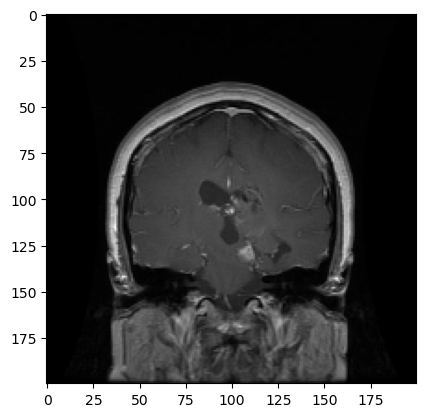

In [8]:
plt.imshow(x[2700], cmap = "gray")

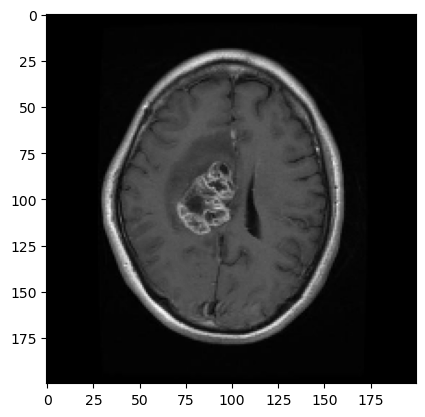

In [9]:
plt.imshow(x[2500], cmap = "gray")

# Preprocessing of the data

### Split data

In [10]:
x_update = x.reshape(len(x), -1)

In [11]:
x_train, x_test, y_train, y_test = train_test_split(x_update, y, test_size = 0.2, random_state=0)

In [12]:
x_train.shape,x_test.shape

((2296, 40000), (574, 40000))

### Feature scaling

In [13]:
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())
x_train = x_train/255
x_test=x_test/255
print(x_train.max(), x_train.min())
print(x_test.max(), x_test.min())

255 0
255 0
1.0 0.0
1.0 0.0


### Feature Selection: PCA

In [14]:
from sklearn.decomposition import PCA

In [15]:
pca = PCA(.98,random_state=0)
pca_train = pca.fit_transform(x_train)
pca_test = pca.transform(x_test)

In [16]:
print(pca_train.shape, pca_test.shape)

(2296, 1291) (574, 1291)


## Train Model

In [17]:
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings("ignore")

In [18]:
log_reg = LogisticRegression(C=0.1)
log_reg.fit(pca_train, y_train)

LogisticRegression(C=0.1)

## Test Model

In [19]:
y_predicted = log_reg.predict(pca_test)

In [20]:

def plot_test_results(path):
    dec = {0:"No tumor", 1:"Pituitary tumor", 2: "Meningioma tumor", 3:"Glioma tumor"}
    plt.figure(figsize = (8,8))
    c = 1
    for i in os.listdir("archive/Testing/"+path)[:9]:
        plt.subplot(3, 3, c)

        img = cv2.imread("archive/Testing/"+path+i,0)
        img1 = cv2.resize(img, (200,200))
        img1 = img1.reshape(1, -1)/255
        p = log_reg.predict(pca.transform(img1))
        plt.title(dec[p[0]])
        plt.imshow(img, cmap = "bone")
        plt.axis("off")
        c+=1

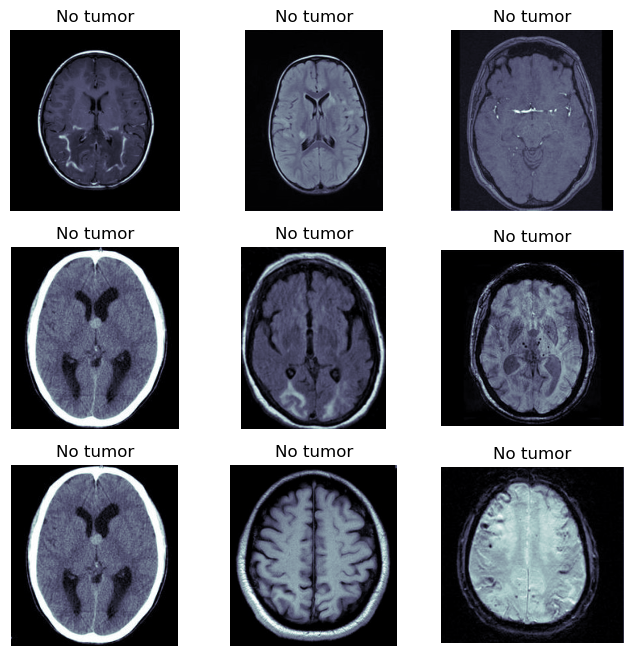

In [21]:
plot_test_results("no_tumor/")

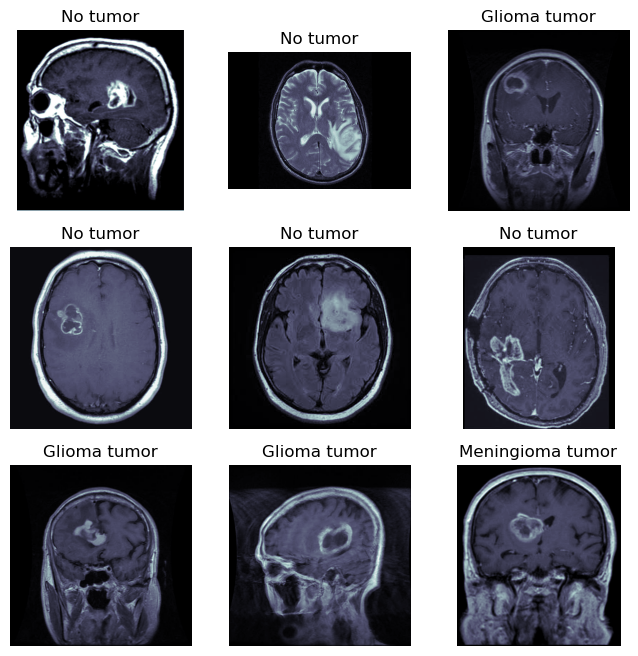

In [22]:
plot_test_results("glioma_tumor/")

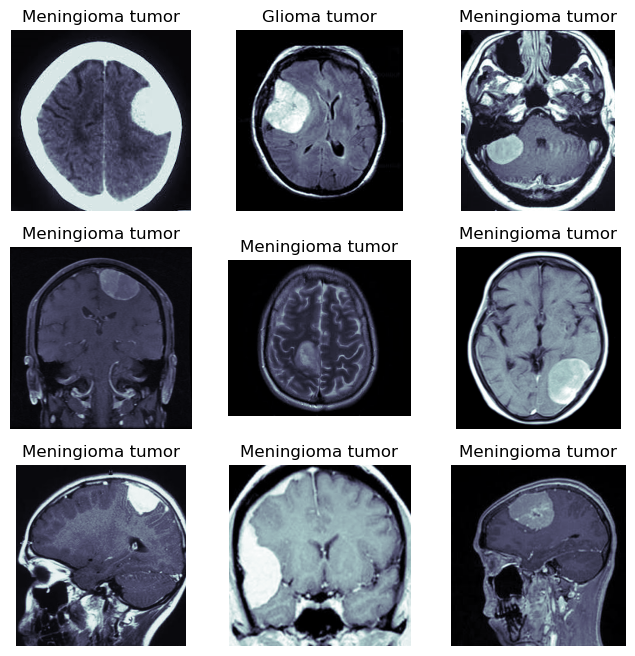

In [23]:
plot_test_results("meningioma_tumor/")

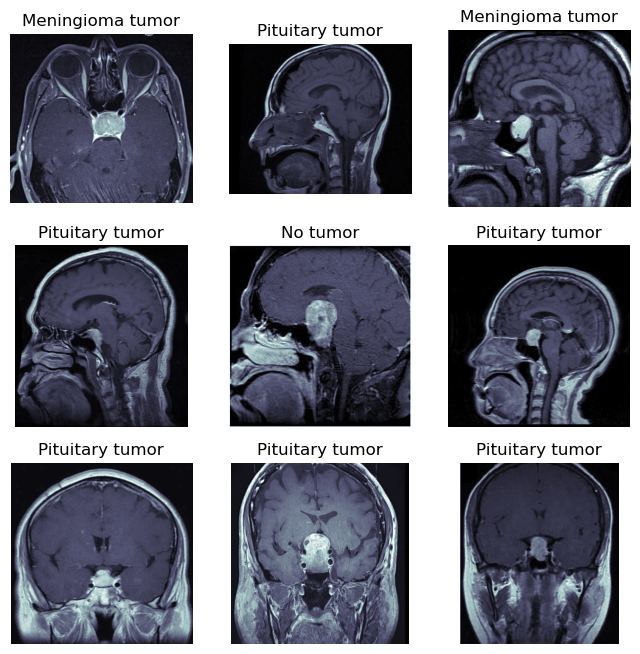

In [24]:
plot_test_results("pituitary_tumor/")

## Evaluation

In [25]:
from sklearn.metrics import accuracy_score, confusion_matrix
cm = confusion_matrix(y_test, y_predicted)
print(cm)
print(accuracy_score(y_test, y_predicted))

[[ 45  10  18   3]
 [  1 177   0   4]
 [  5   7 113  25]
 [  2   3  23 138]]
0.8240418118466899


In [26]:
print("Training score:", log_reg.score(pca_train, y_train))
print("Test score:", log_reg.score(pca_test, y_test))

Training score: 0.9986933797909407
Test score: 0.8240418118466899
